# Online conent sharing project

# 1) Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from geopy.distance import great_circle
import scipy.stats as stats
import pylab
from scipy.stats import skew,kurtosis
from scipy.stats.mstats import winsorize
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
pd.pandas.set_option('display.max_columns',None)

# 2) Loading the dataset

In [3]:
train_df=pd.read_csv(r"C:\Users\Balasubramanian\Desktop\work\ml\ML-Assignment\train_abc.csv")
test_df=pd.read_csv(r"C:\Users\Balasubramanian\Desktop\work\ml\ML-Assignment\test_abc.csv")

In [4]:
train_df

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...,...
89192,89193,23996,15,32,25,Male,Other,340,662,3.91
89193,89194,20466,20,47,31,Male,Other,240,892,3.56
89194,89195,13655,16,97,25,Male,Student,270,462,4.23
89195,89196,24840,9,18,35,Male,Working Professional,230,819,3.77


In [4]:
test_df

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840
...,...,...,...,...,...,...,...,...,...
11116,100314,26336,25,140,21,Male,Student,240,317
11117,100315,6772,8,100,19,Female,Student,280,628
11118,100316,2042,16,98,22,Male,Student,270,462
11119,100317,24626,8,16,33,Male,Other,280,628


# 3) Dataset Info

In [5]:
train_df.shape

(89197, 10)

In [6]:
# Here we have 89197 rows and 10 columns

In [8]:
test_df.shape

(11121, 9)

In [9]:
# Here we have 11121 rowsand 9 columns

In [10]:
# For seeing fist 5 rows
train_df.head

<bound method NDFrame.head of        row_id  user_id  category_id  video_id  age  gender  \
0           1    19990           37       128   24    Male   
1           2     5304           32       132   14  Female   
2           3     1840           12        24   19    Male   
3           4    12597           23       112   19    Male   
4           5    13626           23       112   27    Male   
...       ...      ...          ...       ...  ...     ...   
89192   89193    23996           15        32   25    Male   
89193   89194    20466           20        47   31    Male   
89194   89195    13655           16        97   25    Male   
89195   89196    24840            9        18   35    Male   
89196   89197    27183           25       150   13    Male   

                 profession  followers  views  engagement_score  
0                   Student        180   1000              4.33  
1                   Student        330    714              1.79  
2                   Student

In [11]:
# we get to know datatype of all the columns and count of data in each columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [12]:
# For seeing last 5 rows
train_df.tail

<bound method NDFrame.tail of        row_id  user_id  category_id  video_id  age  gender  \
0           1    19990           37       128   24    Male   
1           2     5304           32       132   14  Female   
2           3     1840           12        24   19    Male   
3           4    12597           23       112   19    Male   
4           5    13626           23       112   27    Male   
...       ...      ...          ...       ...  ...     ...   
89192   89193    23996           15        32   25    Male   
89193   89194    20466           20        47   31    Male   
89194   89195    13655           16        97   25    Male   
89195   89196    24840            9        18   35    Male   
89196   89197    27183           25       150   13    Male   

                 profession  followers  views  engagement_score  
0                   Student        180   1000              4.33  
1                   Student        330    714              1.79  
2                   Student

In [13]:
# Here we can find the basic statistics data of the database 
train_df.describe(include="all").round(2)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
count,89197.0,89197.00,89197.00,89197.00,89197.00,89197,89197,89197.00,89197.00,89197.00
unique,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Male,Student,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,52397,44638,NaN,NaN,NaN
mean,44599.0,13881.91,18.32,77.72,24.85,NaN,NaN,252.46,502.98,3.49
std,25749.1,8005.58,11.68,48.47,8.96,NaN,NaN,46.09,268.57,0.86
min,1.0,1.00,1.00,1.00,10.00,NaN,NaN,160.00,30.00,0.00
25%,22300.0,6945.00,8.00,34.00,18.00,NaN,NaN,230.00,229.00,2.90
50%,44599.0,13892.00,16.00,76.00,23.00,NaN,NaN,240.00,467.00,3.71
75%,66898.0,20819.00,26.00,120.00,32.00,NaN,NaN,280.00,714.00,4.15


In [14]:
## Independent variable
# row_id- Unique identifier of the row
# user_id- Unique identifier of the user
# category_id- Category of the video
# video_id-Unique identifier of the video
# age- Age of the user
# gender- Gender of the user (Male and Female)
# profession- Profession of the user (Student, Working Professional, Other)
# followers- No. of users following a particular category
# views- Total views of the videos present in the particular category

## Dependent variable
# Engagement_score- Engagement score of the video for a user

In [15]:
train_df.isna().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [16]:
# We can see that there is no Null value in dataset

In [17]:
# we set the display format for floating-point numbers
pd.set_option("display.float_format", str)

In [18]:
# Checking unique value
train_df.nunique()

row_id              89197
user_id             27734
category_id            47
video_id              175
age                    58
gender                  2
profession              3
followers              17
views                  43
engagement_score      229
dtype: int64

# Observation
- we have total of 89197 rows of data
- we have age group from 1 year - 58 years
- we have total of 3 types of proffesion (Students, Working, Others)
- we have 2 genders(Male, Female)
- we have no null value present in the dataset

# 4) Univariant Analysis
- Analysis of all fetures individualy

In [19]:
# #Categorical Columns:

# gender
# profession

##Numeric Columns:

# row_id
# user_id
# category_id
# video_id
# age
# followers
# views
# engagement_score

In [20]:
# Drop Row ID , because we don't need it.

train_df.drop(columns="row_id",inplace=True)
test_df.drop(columns="row_id",inplace=True)

C:\Users\Balasubramanian\AppData\Local\Temp\ipykernel_4496\4242911493.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['engagement_score'])


<Axes: xlabel='engagement_score', ylabel='Density'>

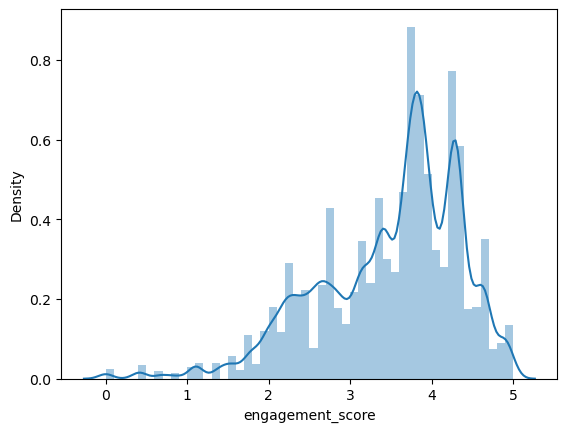

In [21]:
# Target variable (engagement_score)
sns.distplot(train_df['engagement_score'])

- The graph is left skwed visibly

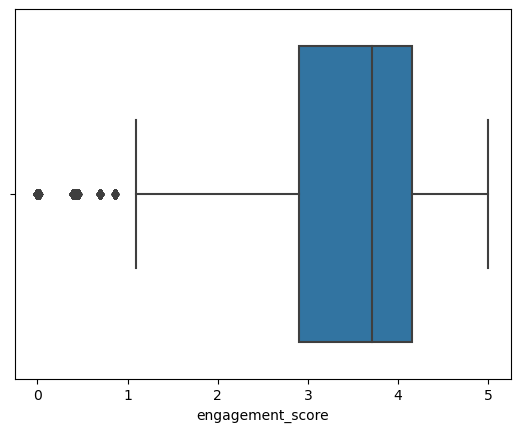

In [22]:
sns.boxplot(x="engagement_score", data=train_df)
plt.show()

In [23]:
# checking for outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Count and display the number of outliers for 'engagement_score'
engagement_score_outliers = detect_outliers_iqr(train_df, 'engagement_score')
print(f'Number of outliers in engagement_score: {len(engagement_score_outliers)}')

Number of outliers in engagement_score: 820


 - As we can see there are outliers but those are scores which is unique and important

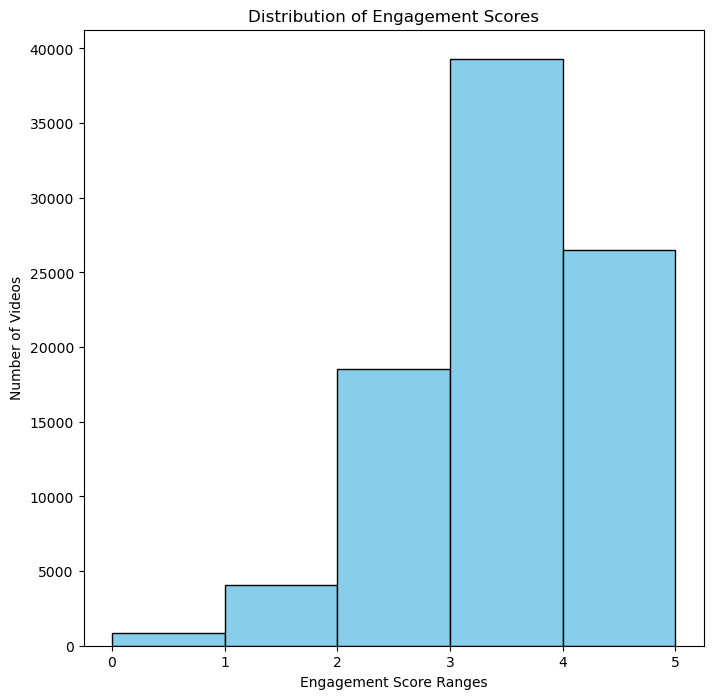

In [24]:
# Define bins for engagement score ranges
bins = [0, 1, 2, 3, 4, 5]

# Create a pie chart using plt.hist
plt.figure(figsize=(8, 8))
plt.hist(train_df['engagement_score'], bins=bins, edgecolor='black', color='skyblue')  # Use a single color for the entire histogram
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score Ranges')
plt.ylabel('Number of Videos')
plt.xticks(bins)
plt.show()

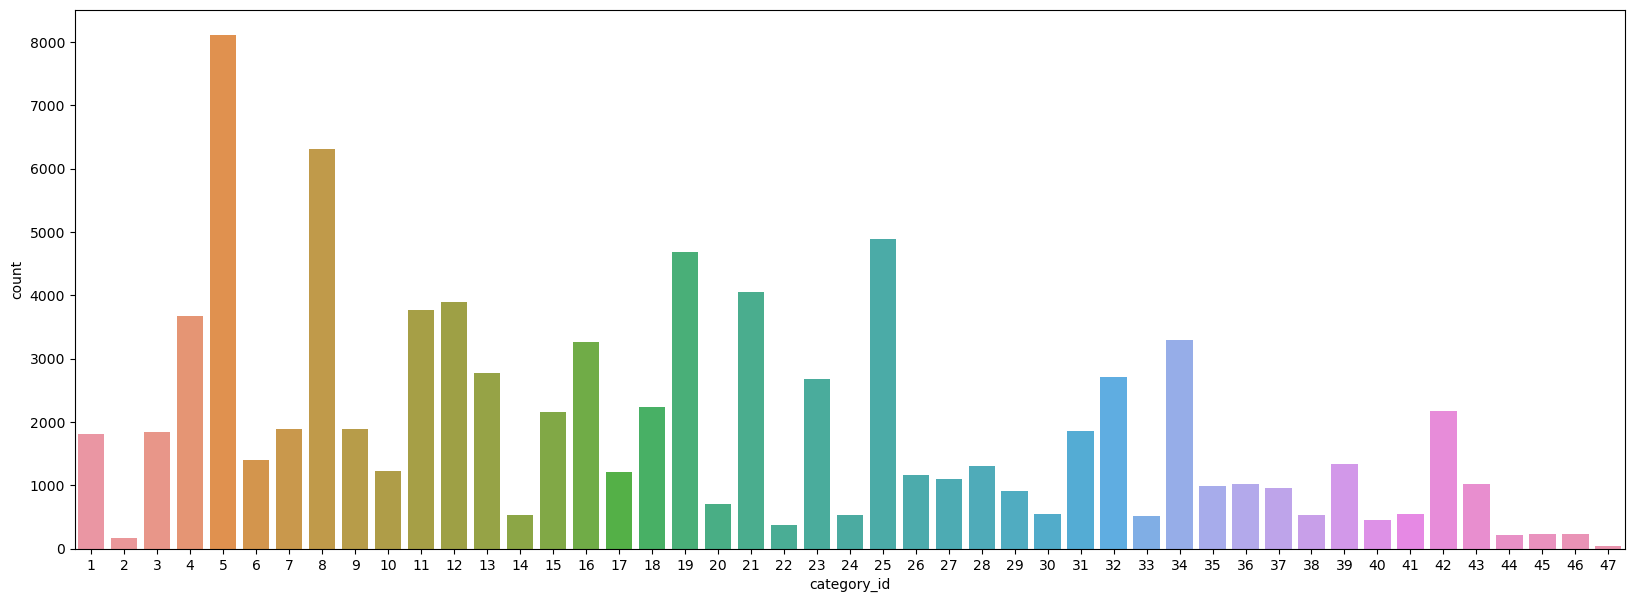

In [25]:
# Other variable (Category_id)
plt.figure(figsize=(20,7))
sns.countplot(x='category_id',data=train_df)
plt.show()

- Category id 5 has higgest percentage 
- Category id 47 has lowestpercentage

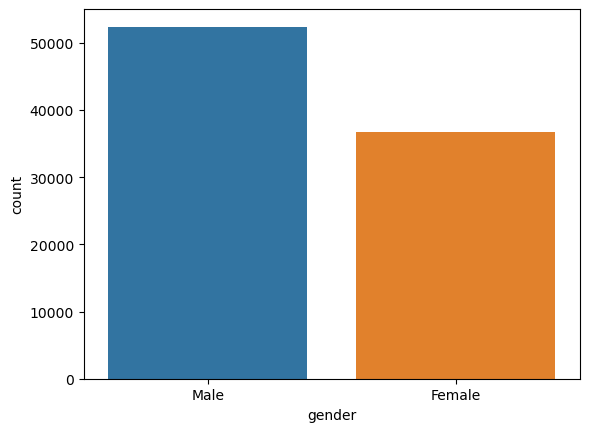

In [26]:
# Other variable (gender)
sns.countplot(x='gender',data=train_df)
plt.show()

- There are ore mae user than female

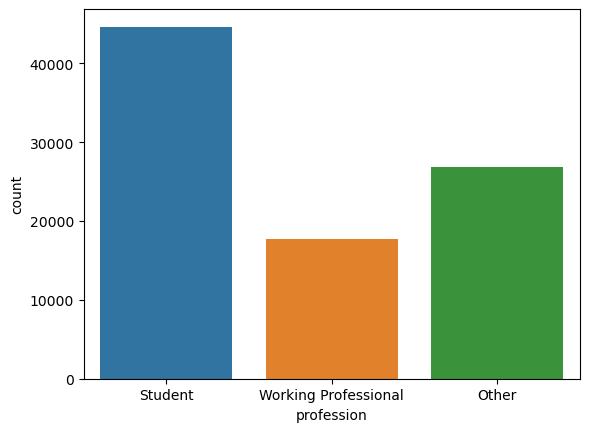

In [27]:
# Other variable (Proffession)
sns.countplot(x='profession',data=train_df)
plt.show()

- There are more student viewership 

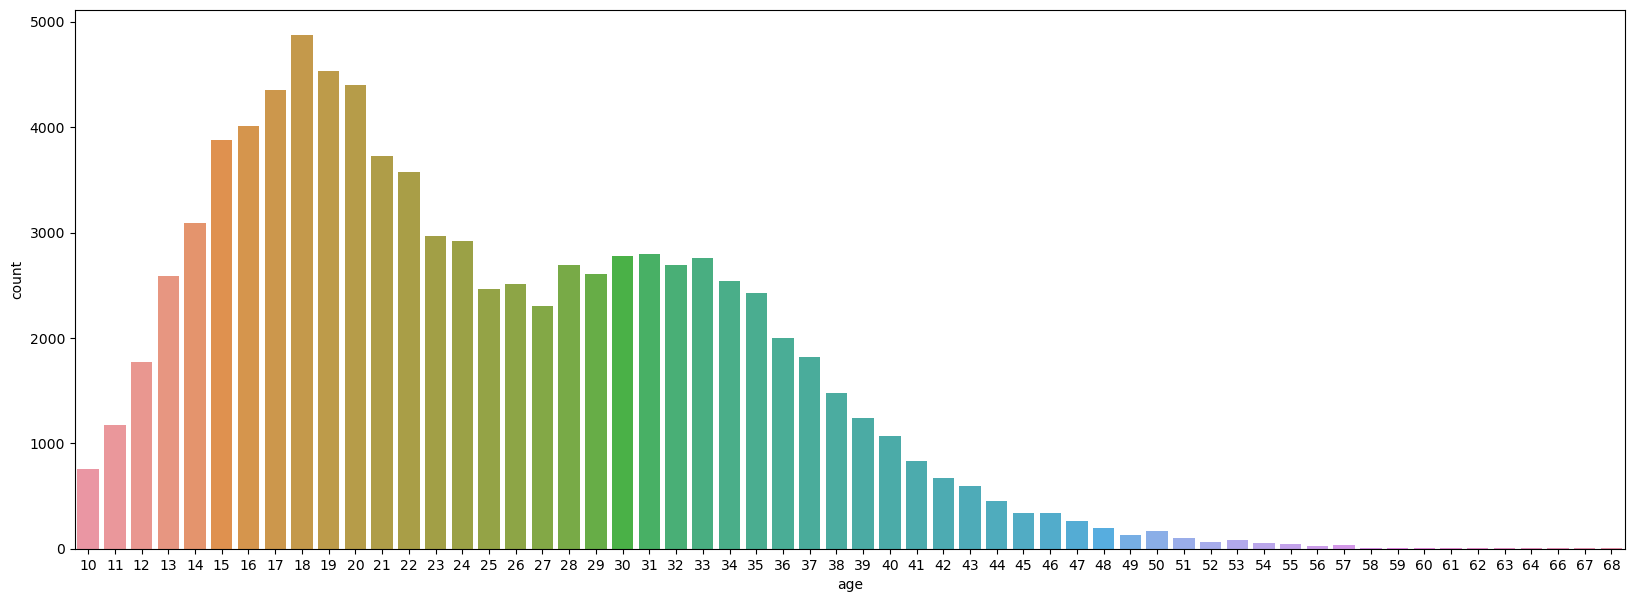

In [28]:
# Other variable (age)
plt.figure(figsize=(20,7))
sns.countplot(x='age',data=train_df)
plt.show()

 - We can clearly say that there are more 18 year age group who see the video

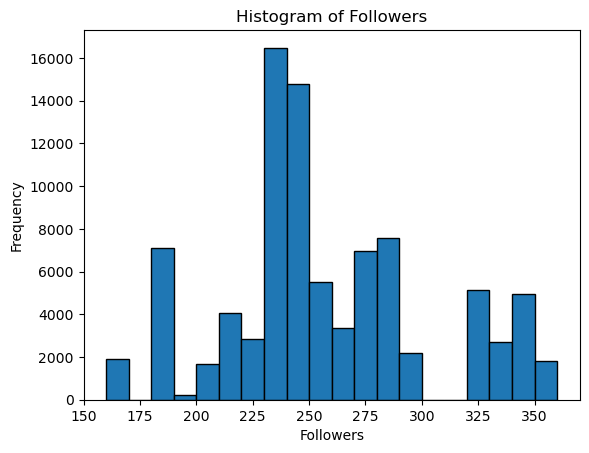

In [29]:
# Other variable (followers)
plt.hist(train_df['followers'], bins=20, edgecolor='black')
plt.title('Histogram of Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()

- we can see most of the content creators have 230-240 followers

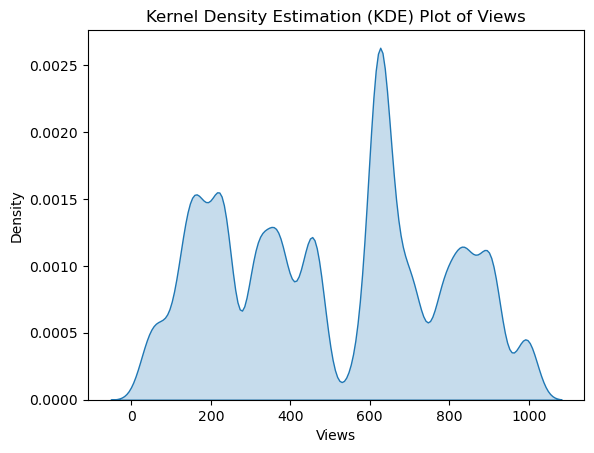

In [30]:
# Other variable (views)
sns.kdeplot(train_df['views'], fill=True)
plt.title('Kernel Density Estimation (KDE) Plot of Views')
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

we can see max view for  video has gone upto 600

# Observation
- Target variable is left skwed
- There are not outliers in engagement score as each engagement score are different and unique
- Category id 5 has high percentage
- There are more male users than female
- majority of user has student as their profession
- We can say than majority of user are of 18 year age group
- majority of users have 230-240 followers
- maximum view for a vidoe has gone upto 600

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           89197 non-null  int64  
 1   category_id       89197 non-null  int64  
 2   video_id          89197 non-null  int64  
 3   age               89197 non-null  int64  
 4   gender            89197 non-null  object 
 5   profession        89197 non-null  object 
 6   followers         89197 non-null  int64  
 7   views             89197 non-null  int64  
 8   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 6.1+ MB


In [32]:
train_df.nunique()

user_id             27734
category_id            47
video_id              175
age                    58
gender                  2
profession              3
followers              17
views                  43
engagement_score      229
dtype: int64

# 5) Bivariant Analysis
- Analysis involves relationship, pattern, and relation between 2 variables

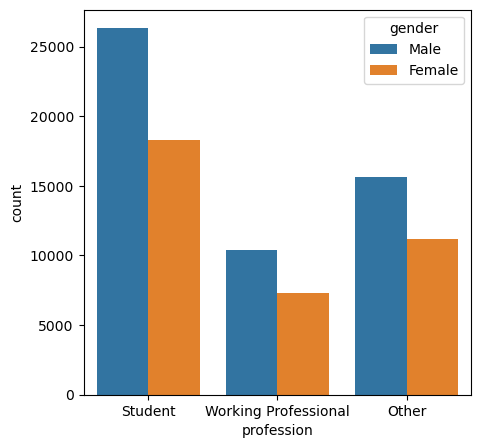

In [33]:
# profession per gender (graph showing various profession with different gender)
plt.figure(figsize=(5,5))
sns.countplot(x="profession",hue="gender",data=train_df)
plt.show()

- we can clearly see that there are more male student who creats video

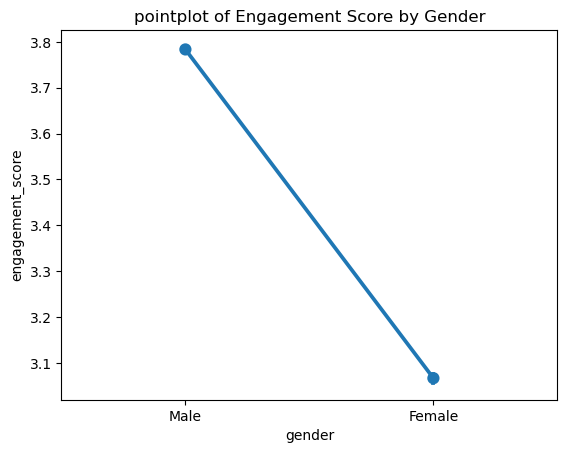

In [34]:
# Engagement score wrt gender (graph showing avg engaement score of male and female)
sns.pointplot(x='gender', y='engagement_score', data=train_df)
plt.title('pointplot of Engagement Score by Gender')
plt.show()

- Avg engagement score of male(3.8) is greater than female(3.1)

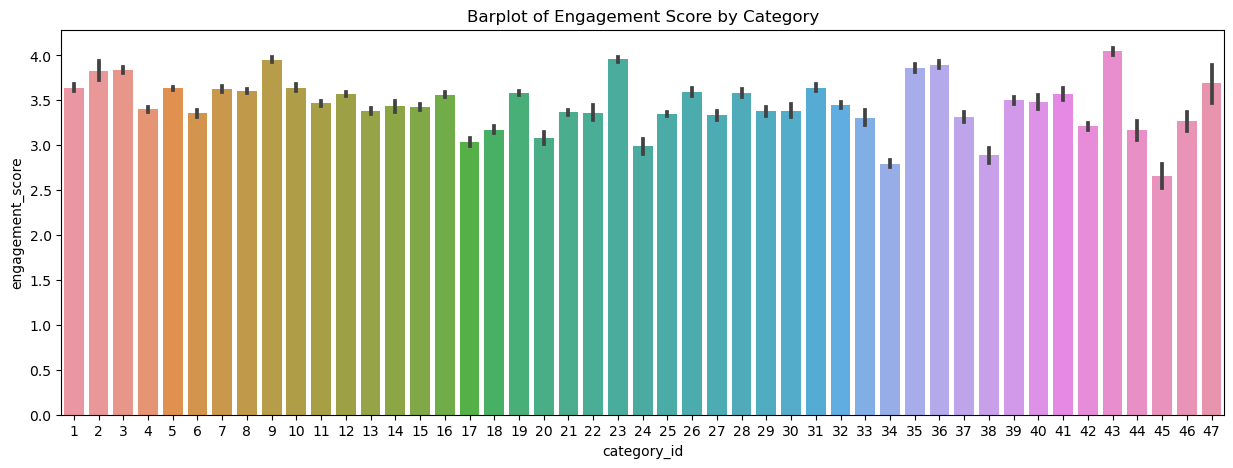

In [35]:
# Engagement score wrt category_id (graph showing avg engaement score of each category)
plt.figure(figsize=(15,5))
sns.barplot(x='category_id', y='engagement_score', data=train_df)
plt.title('Barplot of Engagement Score by Category')
plt.show()

- Avg engagement score for category_id 9,23,43 is more than 4
- Avg engagement score for category_id 45 is less than 2.5

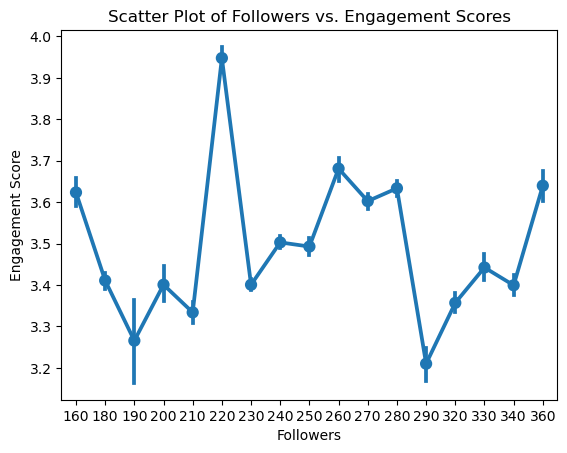

In [36]:
# Engagement score followers (graph showing engagement score trend wrt followers)
sns.pointplot(x='followers',y='engagement_score',data=train_df)
plt.title('Scatter Plot of Followers vs. Engagement Scores')
plt.xlabel('Followers')
plt.ylabel('Engagement Score')
plt.show()

- The engagemnet score of users were highest with 220 followers

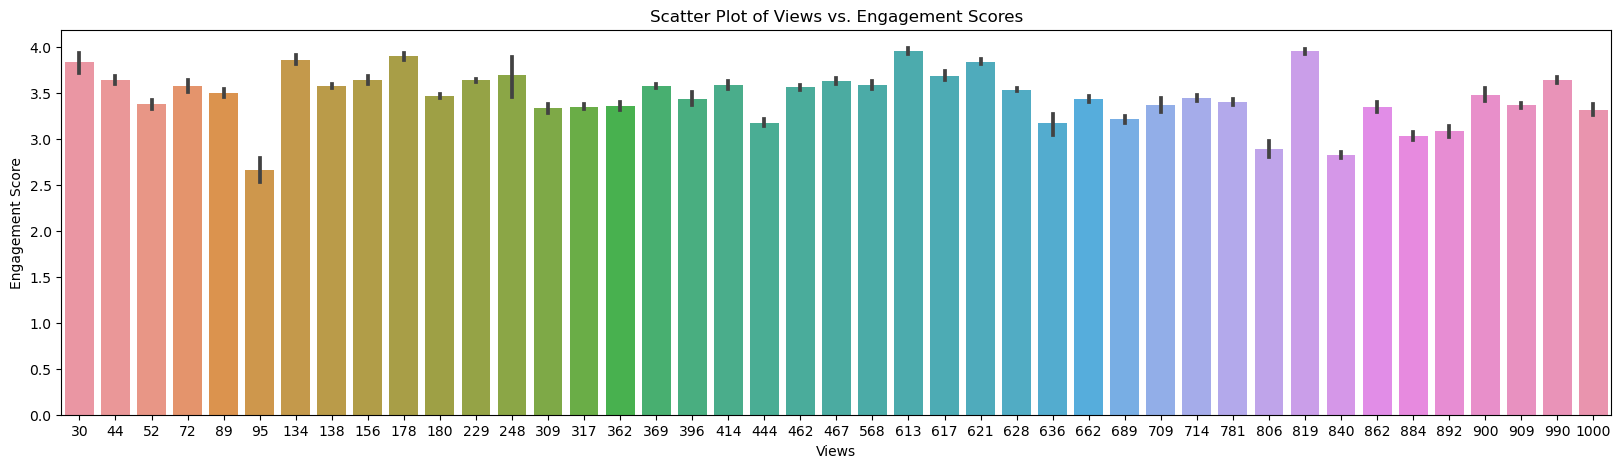

In [37]:
# Engagement score wrt  views (graph showing engagement score trend wrt views)
plt.figure(figsize=(20,5))
sns.barplot(x='views', y='engagement_score',data=train_df)
plt.title('Scatter Plot of Views vs. Engagement Scores')
plt.xlabel('Views')
plt.ylabel('Engagement Score')
plt.show()

- There is no such relation between engagement score and views

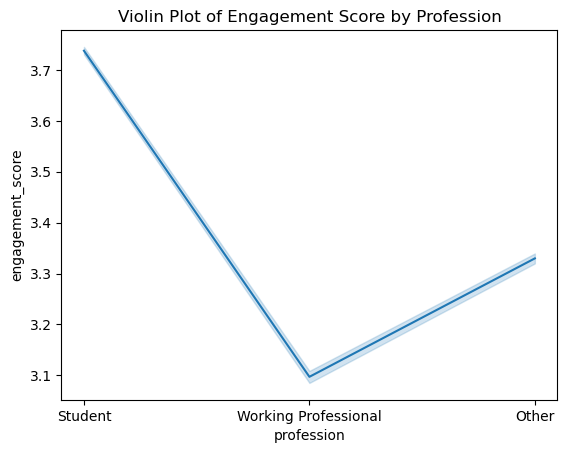

In [38]:
# Engagement score wrt profession (graph showing engagement score trend wrt profession)
sns.lineplot(x='profession', y='engagement_score', data=train_df)
plt.title('Violin Plot of Engagement Score by Profession')
plt.show()

- student as a user have more engagement score

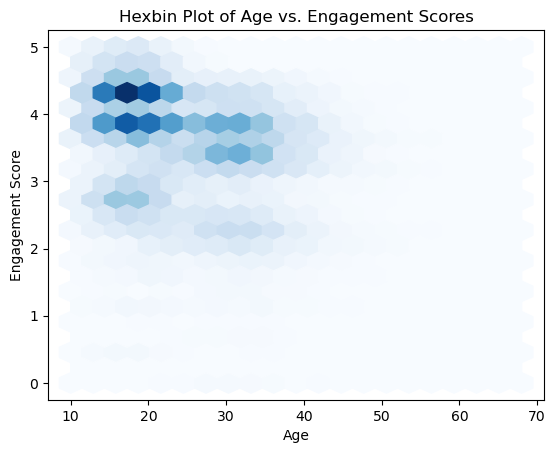

In [39]:
# Engagement score wrt age (graph showing engagement score trend wrt age)
plt.hexbin(train_df['age'], train_df['engagement_score'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Age vs. Engagement Scores')
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.show()

- Avg engagement score in more in he age group of 18-20

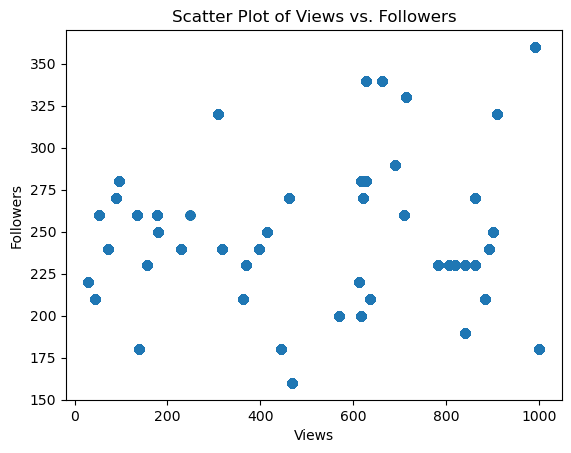

Correlation between Views and Followers: 0.36


In [40]:
# followers wrt view (graph showing folowers trend wrt views)
plt.scatter(train_df['views'], train_df['followers'], alpha=0.5)
plt.title('Scatter Plot of Views vs. Followers')
plt.xlabel('Views')
plt.ylabel('Followers')
plt.show()

correlation_views_followers = np.corrcoef(train_df['views'], train_df['followers'])[0, 1]
print(f'Correlation between Views and Followers: {correlation_views_followers:.2f}')

- There is a positive and linear behaviour between views and followers 

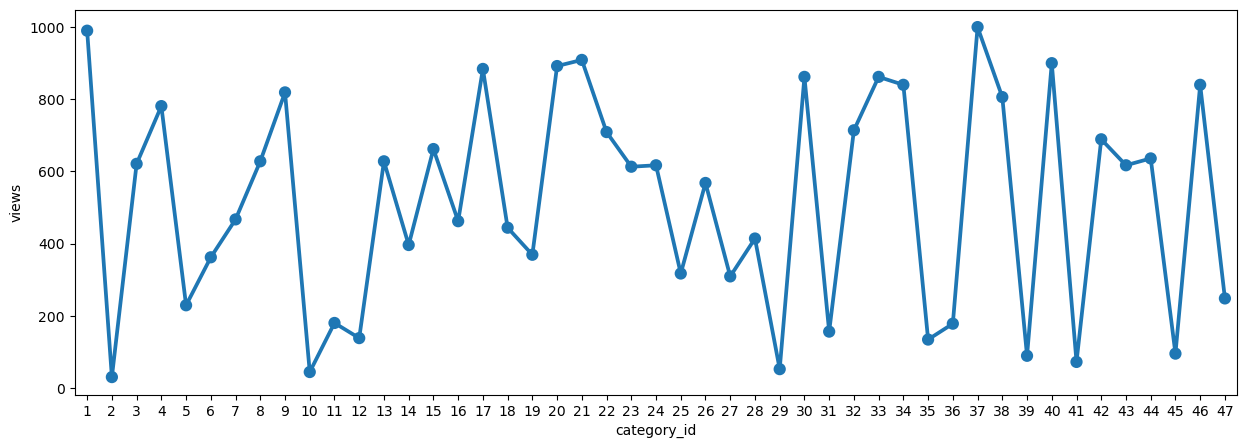

In [41]:
plt.figure(figsize=(15,5))
sns.pointplot(x="category_id",y="views",data=train_df)
plt.show()

- Category id 37 has higgest view
- category id 2 has lowest view

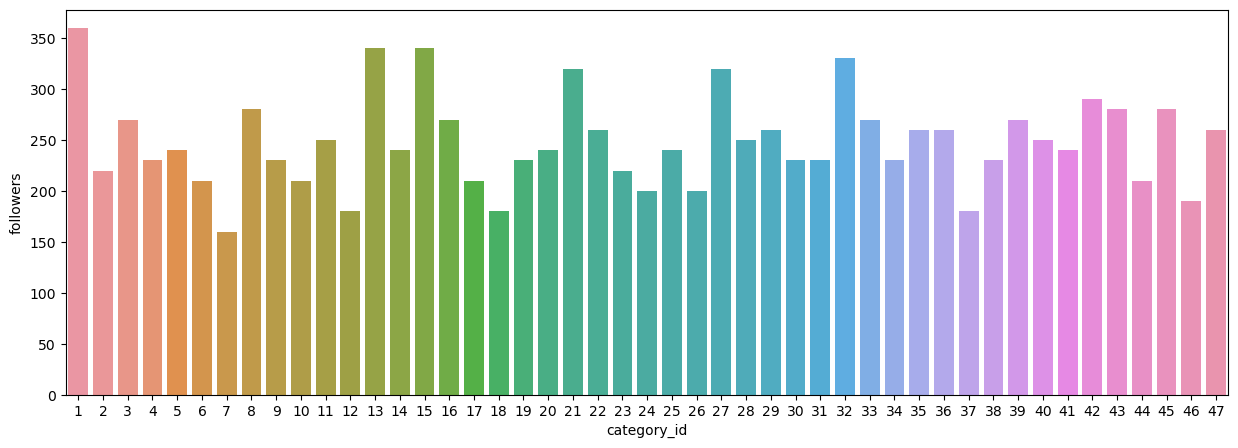

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x="category_id",y="followers",data=train_df)
plt.show()

- category id 1 has higgest number of followers
- category id 7 has lowwest number of followers

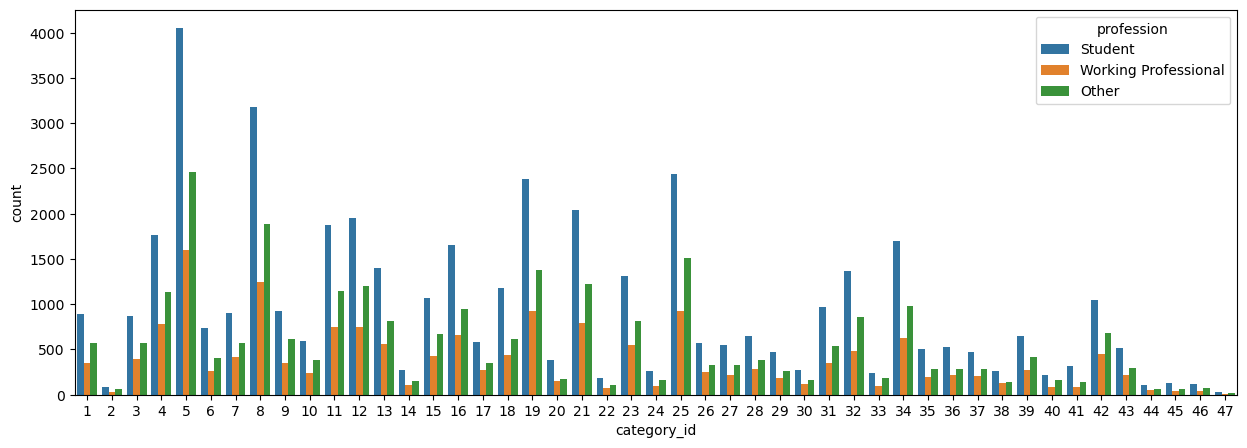

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x="category_id",hue="profession",data=train_df)
plt.show()

- student user create higgest number of video from category id 5
- working profession user create higgest number of video from category id 5
- other user create higgest number of video from category id 5
- student user create lowest number of video from category id 47
- working profession user create lowest number of video from category id 47
- other user create lowest number of video from category id 47


# Observation
- There are more number of male as student, working professional and others
- Avg engagement score of male(3.8) is greater than female (3.1)
- Avg engagement score for category_id 9,23,43 is more than 4
- Avg engagement score for category_id 45 is less than 2.5 
- The engagement score for users are highest with 220 followers
- There is no relation of engagement score with views
- Student as a user have more engagement score
- Avg engagement score is more in age group of 18-20
- There is a positive and linear behaviour between views and followers
- Category id 37 has higgest view
- category id 2 has lowest view
- category id 1 has higgest number of followers
- category id 7 has lowwest number of followers
- student user create higgest number of video from category id 5
- working profession user create higgest number of video from category id 5
- other user create higgest number of video from category id 5
- student user create lowest number of video from category id 47
- working profession user create lowest number of video from category id 47
- other user create lowest number of video from category id 47

# 6) Multivarian Analysis
- Analysis between 2 or more than 2 features in the dataset

Text(0.5, 1.0, 'Comparing age with engagement score by the gender ')

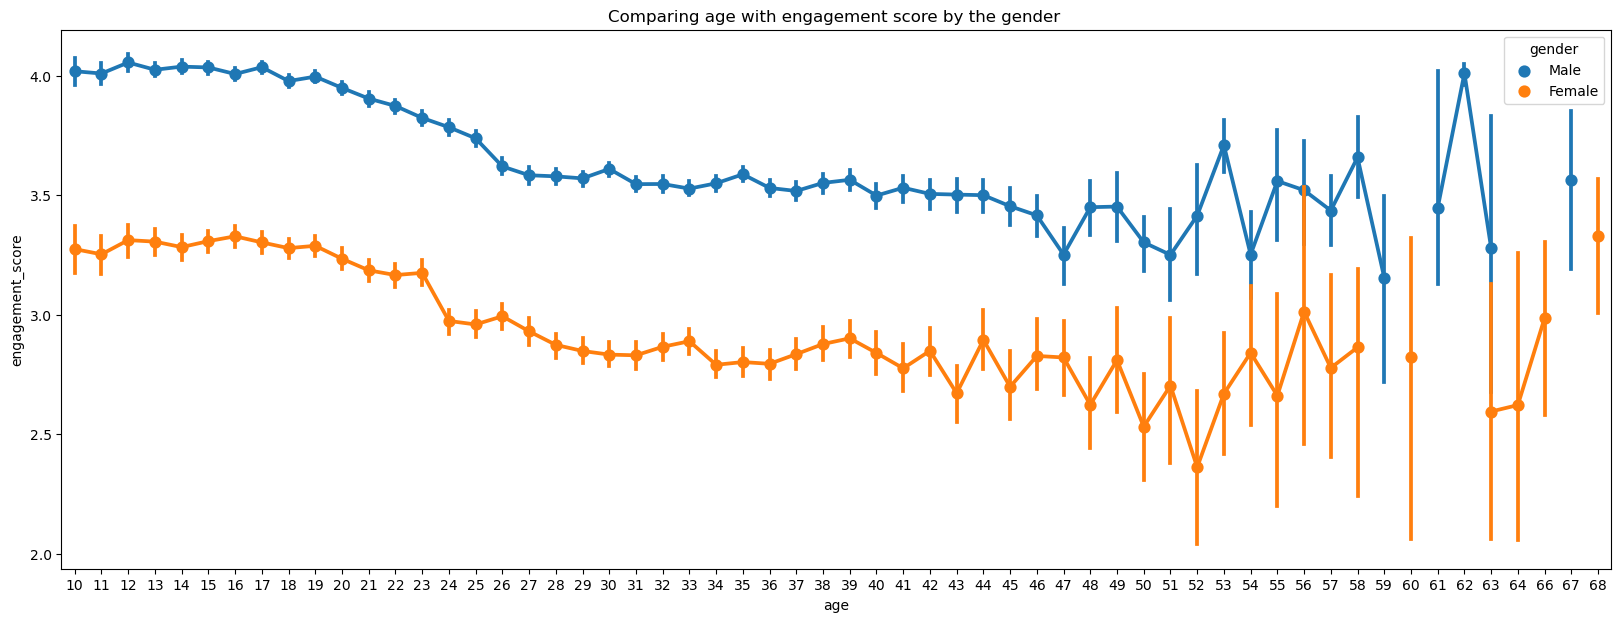

In [44]:
# Comparing age with engagement score by the gender 

plt.figure(figsize=(20,7))
sns.pointplot(data=train_df,x="age",y="engagement_score",hue="gender")
plt.title("Comparing age with engagement score by the gender ")

- Engagement score of age group 10-20 is more in male than female

Text(0.5, 1.0, 'Comparing age with views by the gender ')

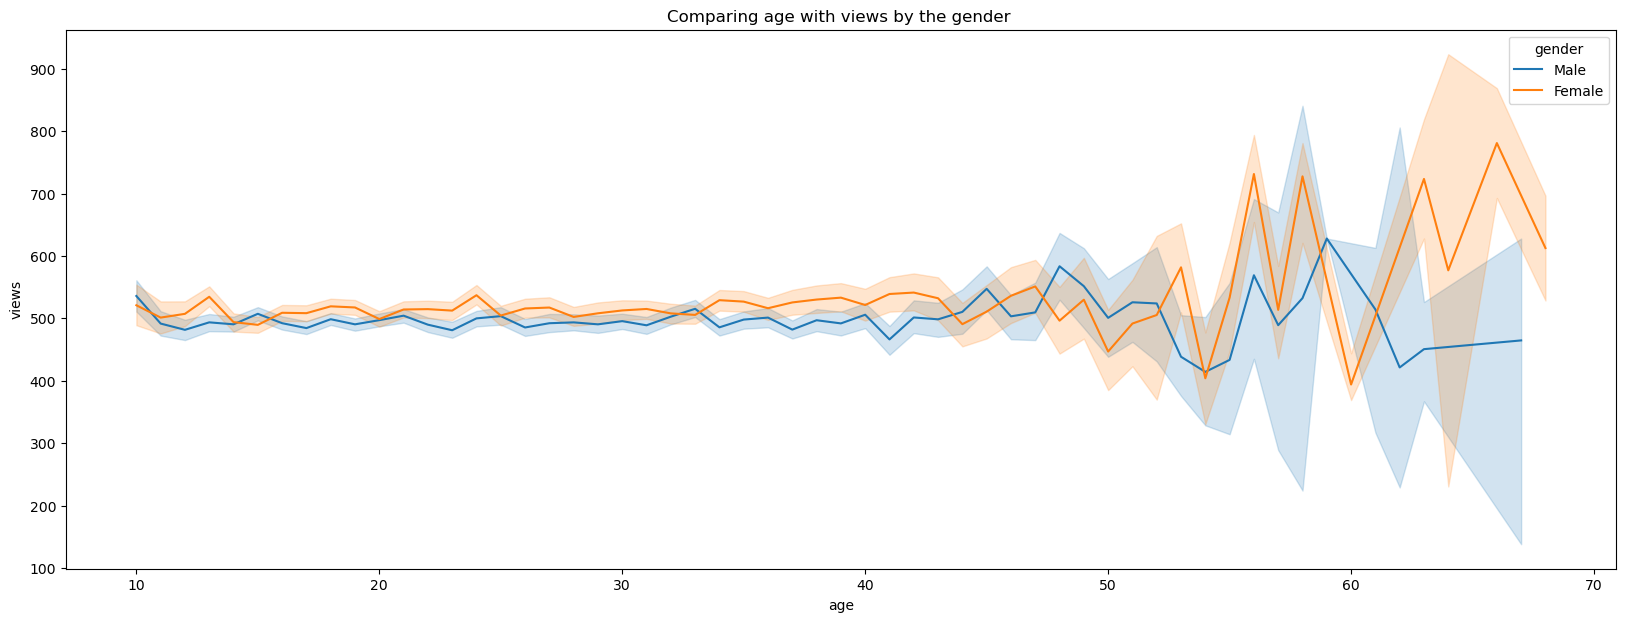

In [45]:
# Comparing age with views by the gender 

plt.figure(figsize=(20,7))
sns.lineplot(data=train_df,x="age",y="views",hue="gender")
plt.title("Comparing age with views by the gender ")

- views rate is almost simlilar till the age of 40 but increases after age of 41

Text(0.5, 1.0, 'Comparing followers with views by the gender ')

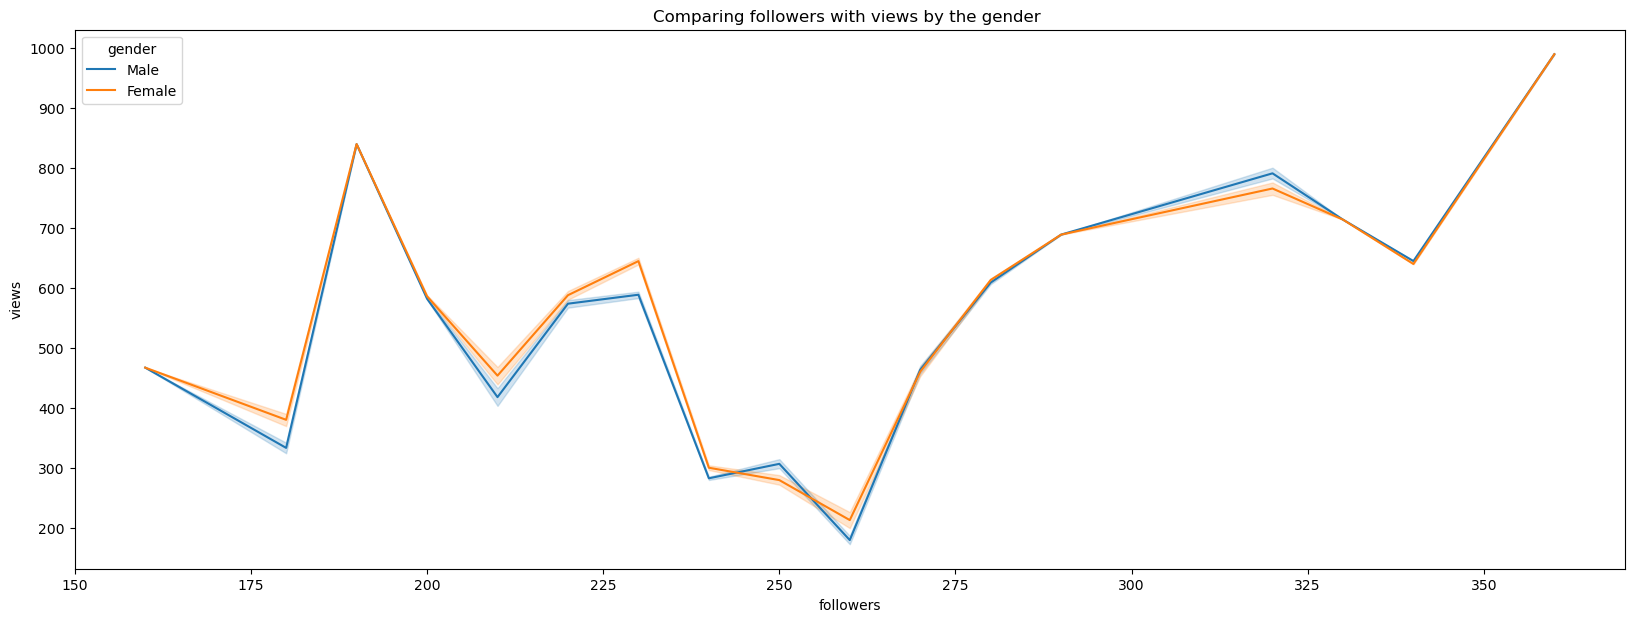

In [46]:
# Comparing followers with views by the gender 

plt.figure(figsize=(20,7))
sns.lineplot(data=train_df,x="followers",y="views",hue="gender")
plt.title("Comparing followers with views by the gender ")

- The trend of followers wrtto views is same in case of male and female

In [47]:
# Group to show the average ["age", "views", "followers", "engagement_score"] by ["profession", "gender"]
avg = train_df.groupby(["profession", "gender"])[["age", "views", "followers", "engagement_score"]].mean().round(2)
avg

age  views  followers  engagement_score
profession           gender                                          
Other                Female 31.65 518.68     252.94              2.91
                     Male   31.67 494.04     252.73              3.63
Student              Female 17.82 509.86     251.97              3.32
                     Male   17.74 494.93     252.71              4.03
Working Professional Female 32.73 516.49     252.11              2.68
                     Male   32.09 498.33     252.02              3.39

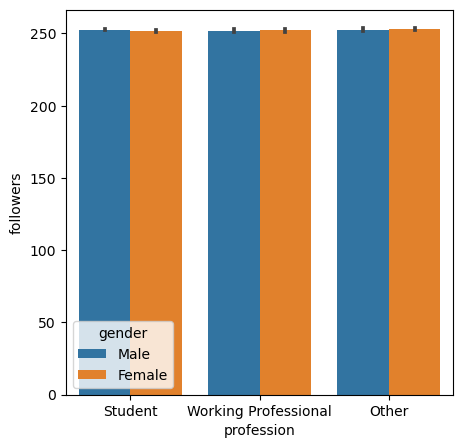

In [48]:
# Comparing followers with proffesion wrt to gender
plt.figure(figsize=(5,5))
sns.barplot(x="profession",y="followers",hue="gender",data=train_df)
plt.show()

- This shows there is almost equal numbers of followers for all three profession (Balanced dataset)

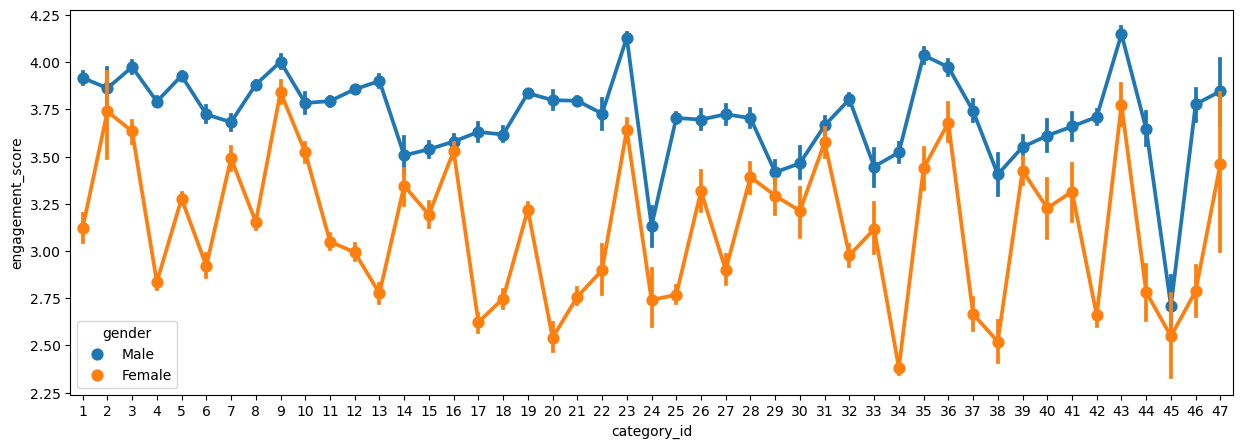

In [49]:
# Comparing engagement score and category id wrt to gender
plt.figure(figsize=(15,5))
sns.pointplot(x="category_id",y="engagement_score",hue="gender",data=train_df)
plt.show()

- Engagement score is higgest for category id 23 for male
- Engagement score is higgest for category id 9 for female
- Engagement score is lowest for category id 45 for male
- Engagement score is lowest for category id 34 for female

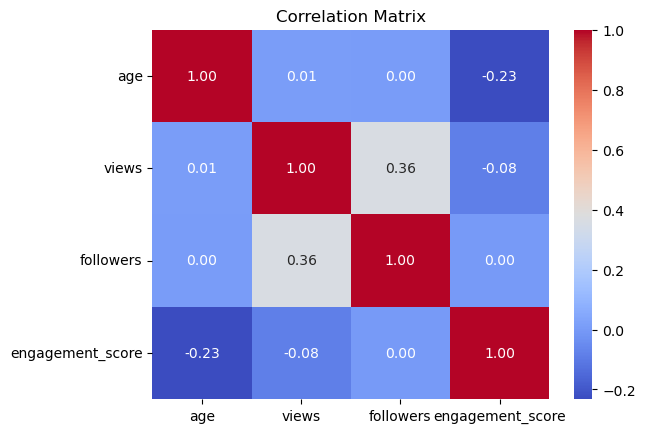

In [50]:
correlation_matrix = train_df[['age', 'views', 'followers', 'engagement_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- We can clearly see that these features are not correlated much to each other

# Observation
- Engagement score of age group 10-20 is more in male than female
- views rate is almost simlilar till the age of 40 but increases after age of 41
- The trend of followers wrtto views is same in case of male and female
- This shows there is almost equal numbers of followers for all three profession (Balanced dataset)
- Engagement score is higgest for category id 23 for male
- Engagement score is higgest for category id 9 for female
- Engagement score is lowest for category id 45 for male
- Engagement score is lowest for category id 34 for female
- We can clearly see that these features are not correlated much to each other

In [51]:
train_df

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.3500000000000005
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91
89193,20466,20,47,31,Male,Other,240,892,3.56
89194,13655,16,97,25,Male,Student,270,462,4.23
89195,24840,9,18,35,Male,Working Professional,230,819,3.77


# 7) Feature Engneering
- Here there are no missing values
- Here there are no temporal variables (year varialble as year is same constant here)

# Feature scaling (Gaussian Transformation)

# Age

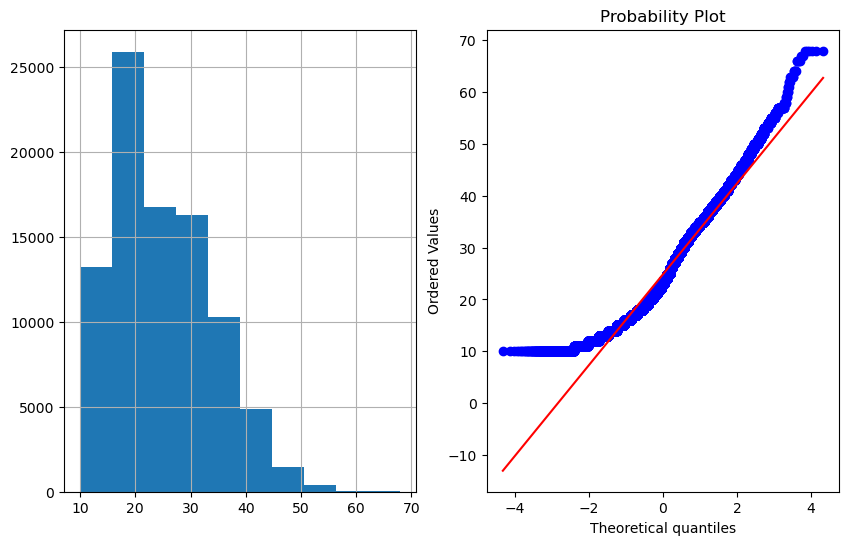

In [52]:
# QQ plot (for ploting histogram and probplot)
def plot_data(train_df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    train_df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(train_df[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(train_df,'age')

In [53]:
skew(train_df['age'])

0.5799500383936332

we have a positive right skew
- Lets perform transformation to scale the feature

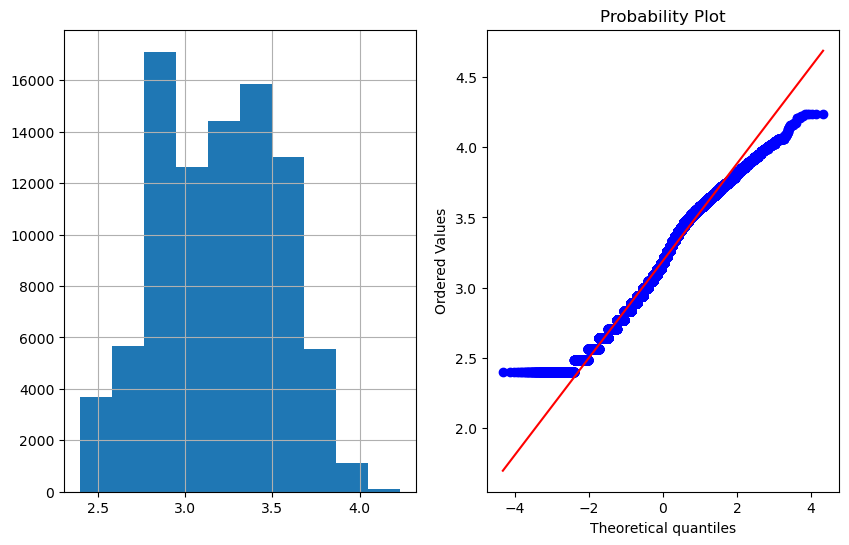

In [54]:
#Log transformation
train_df['age_log']=np.log(train_df['age']+1)
plot_data(train_df,'age_log')


In [55]:
skew(train_df['age_log'])

-0.04961045741331476

Graph is (0.04) negatively skwed

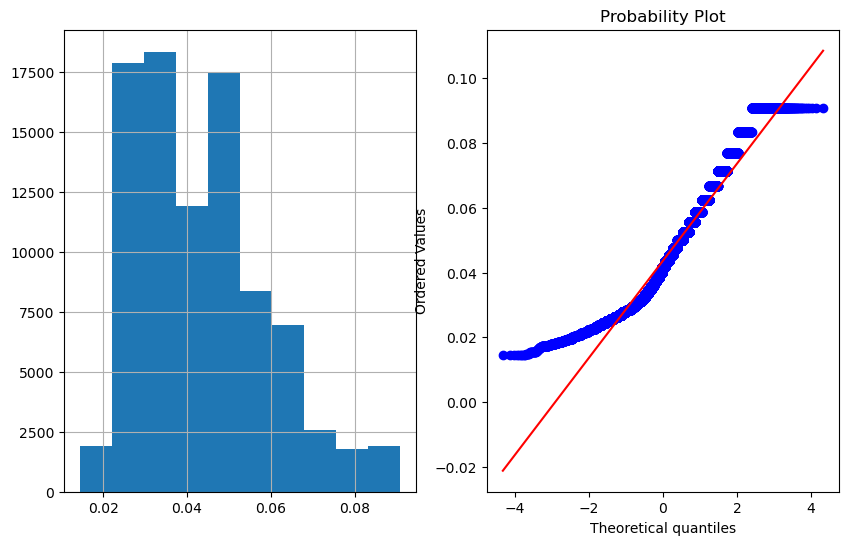

In [56]:
# Reciprocal Transformation
train_df['age_rec']=1/(train_df['age']+1)
plot_data(train_df,'age_rec')

In [57]:
skew(train_df['age_rec'])

0.6896808421611017

 graph is (0.68) positively skwed

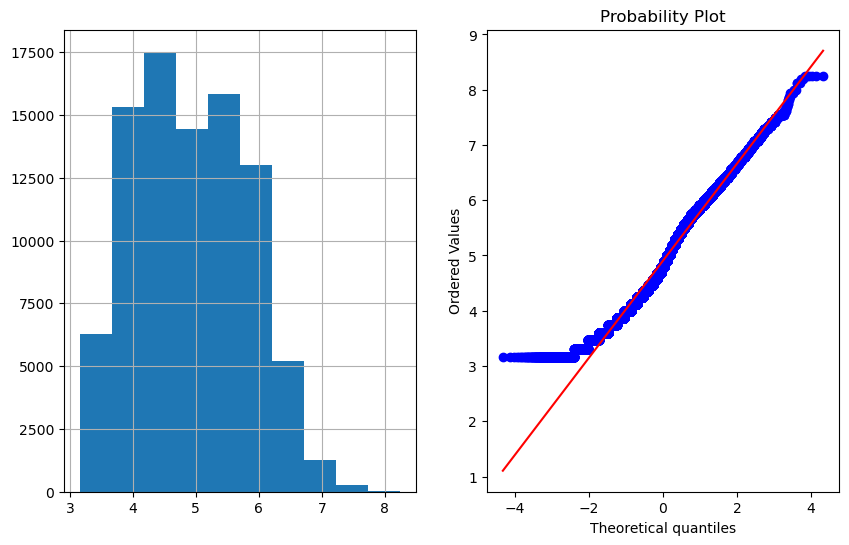

In [58]:
#square root transformation
train_df['age_root']=train_df.age**(1/2)
plot_data(train_df,'age_root')

In [59]:
skew(train_df['age_root'])

0.2464738485820048

graph is (0.24) positively skwed

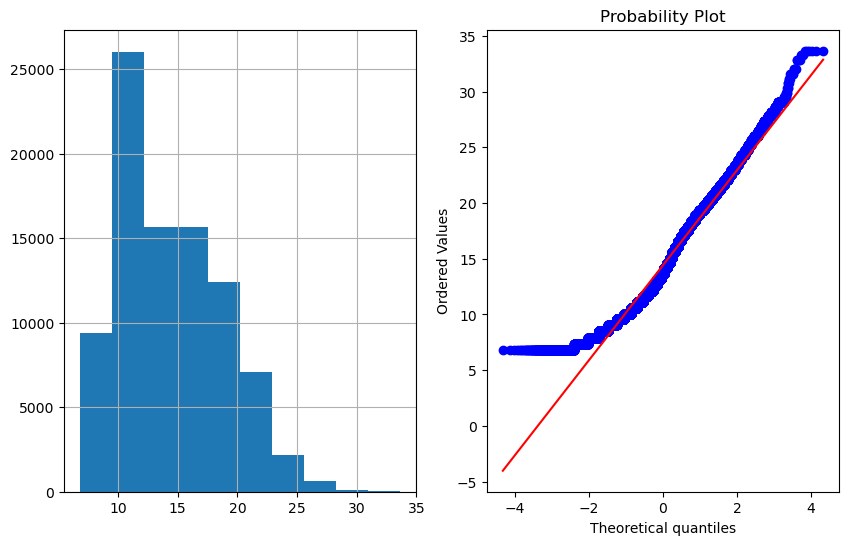

In [60]:
#exponential Transformation
train_df['age_exp']=train_df.age**(1/1.2)
plot_data(train_df,'age_exp')

In [61]:
skew(train_df['age_exp'])

0.46660059834995016

graph is (0.46) positively skwed

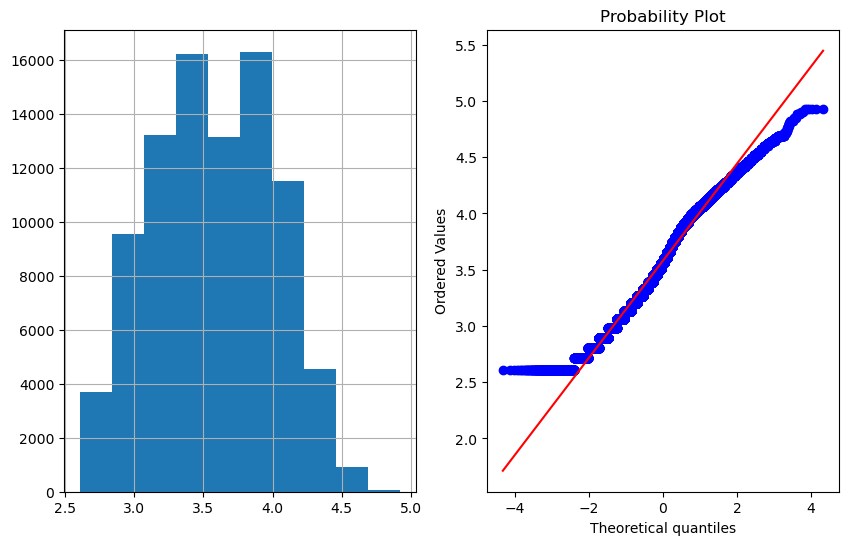

In [62]:
# Box cox transformation
train_df['age_boxcox'], lambda_value = stats.boxcox(train_df['age']+1)
plot_data(train_df,'age_boxcox')

In [63]:
skew(train_df['age_boxcox'])

-0.006644220876835169

graph is (0.0066) negatively skwed the best transformation till now

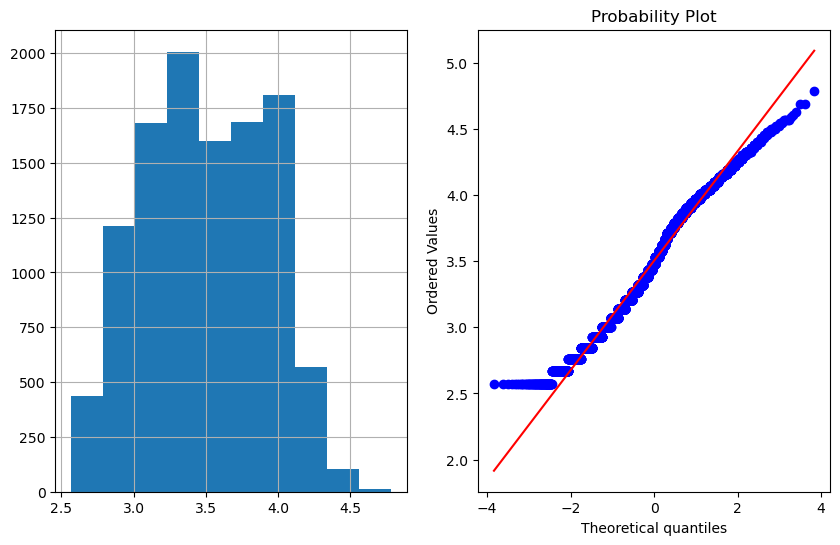

In [64]:
# Applying similar transformation on test dataset
# Boxcox transformation
test_df['age_boxcox'], lambda_value = stats.boxcox(test_df['age']+1)
plot_data(test_df,'age_boxcox')


In [65]:
skew(test_df['age_boxcox'])

-0.00554488541822319

In [66]:
# Droping columns which are not required as we did it for analysis
columns_to_drop = ['age_log','age_rec','age_root','age_exp']

# Drop the specified columns
train_df = train_df.drop(columns=columns_to_drop)

# Engagement_score

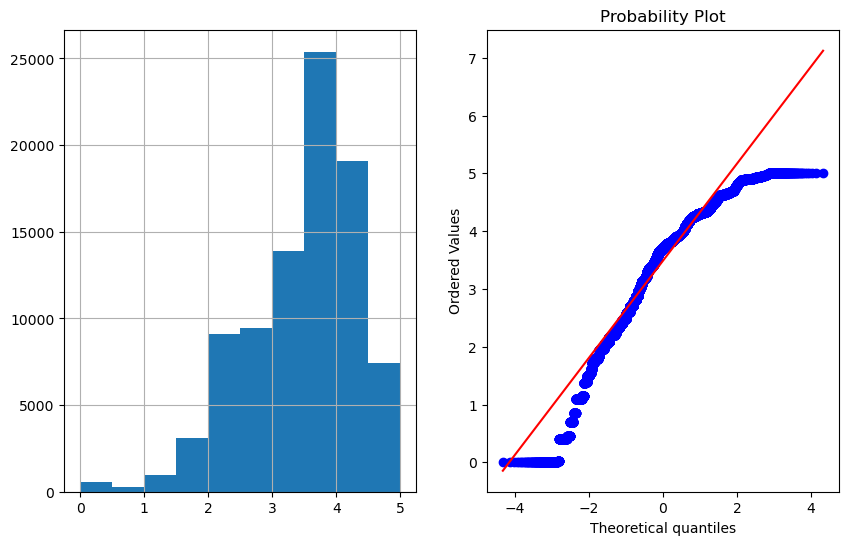

In [67]:
# QQ plot (for ploting histogram and probplot)
def plot_data(train_df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    train_df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(train_df[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(train_df,'engagement_score')

In [68]:
skew(train_df['engagement_score'])

-0.8556159495878258

Graph is (0.85) negatively skwed 
- We need to transform the feature

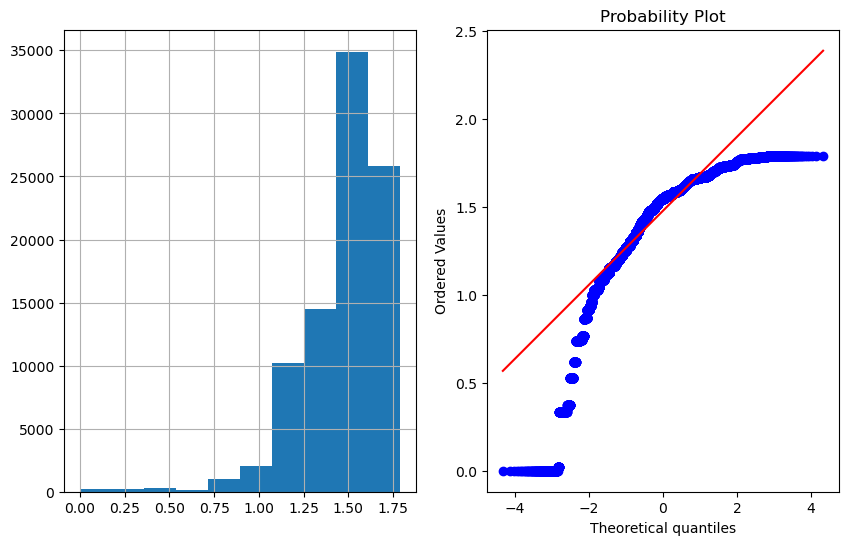

In [69]:
#Log transformation
train_df['es_log']=np.log(train_df['engagement_score']+1)
plot_data(train_df,'es_log')

In [70]:
skew(train_df['es_log'])

-1.924088482875838

Graph is (-1.92) negatively skwed

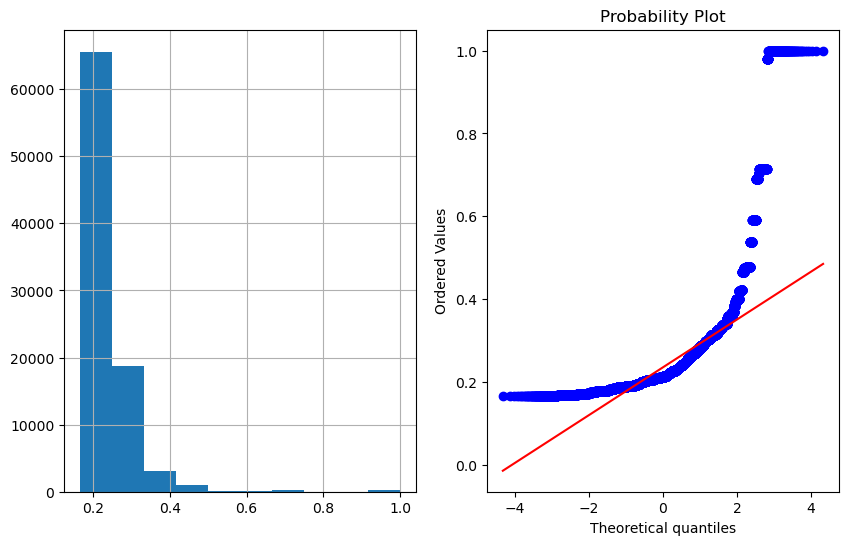

In [71]:
# Reciprocal Transformation
train_df['es_rec']=1/(train_df['engagement_score']+1)
plot_data(train_df,'es_rec')

In [72]:
skew(train_df['es_rec'])

4.720554932992756

Graph is (4.72) positively skwed

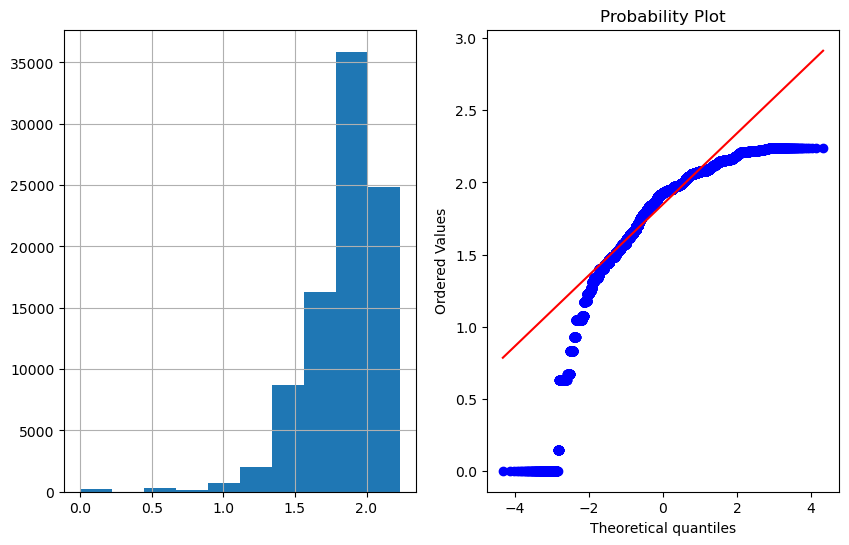

In [73]:
#square root transformation
train_df['es_root']=train_df.engagement_score**(1/2)
plot_data(train_df,'es_root')

In [74]:
skew(train_df['es_root'])

-1.849517911257575

Graph is (-1.84) negatively skwed

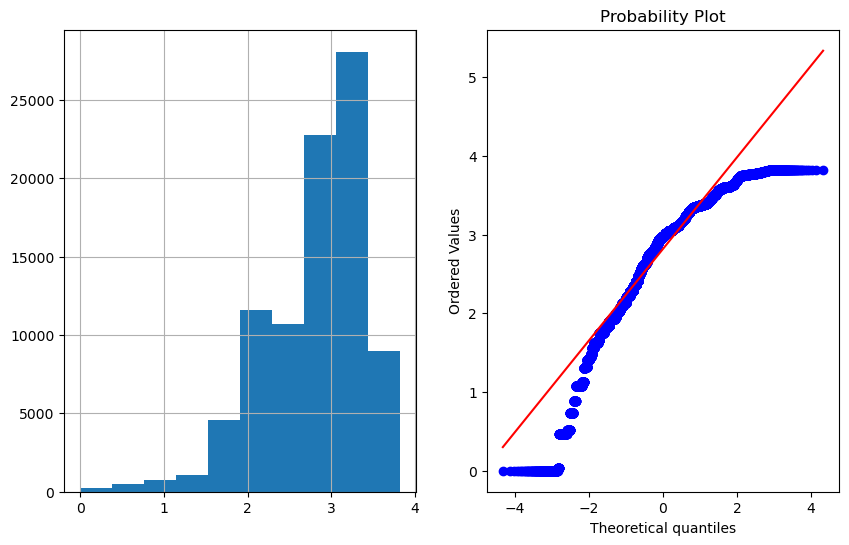

In [75]:
#exponential Transformation
train_df['es_exp']=train_df.engagement_score**(1/1.2)
plot_data(train_df,'es_exp')

In [76]:
skew(train_df['es_exp'])

-1.0568715857851314

Graph is (-1.05) negatively skwed

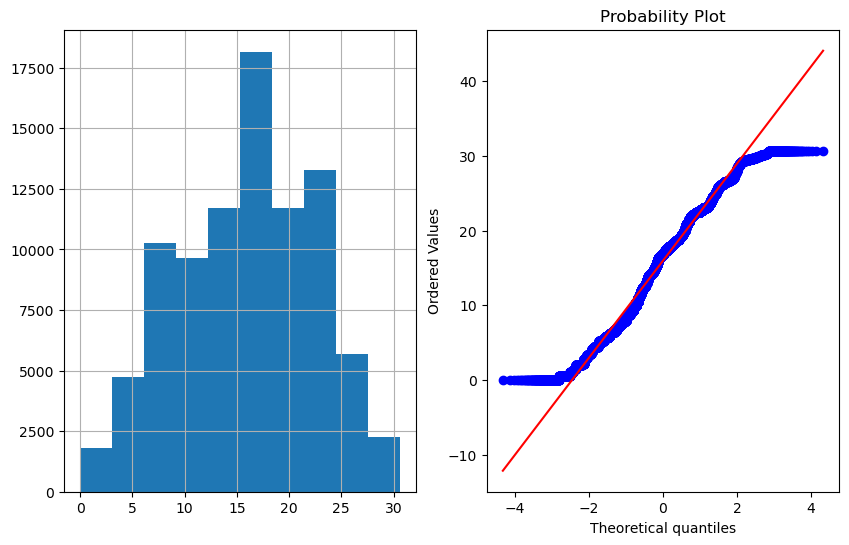

In [77]:
# Box cox transformation
train_df['es_boxcox'], lambda_value = stats.boxcox(train_df['engagement_score']+1)
plot_data(train_df,'es_boxcox')

In [78]:
skew(train_df['es_boxcox'])

-0.1601852520230001

graph is (0.16) negatively skwed the best transformation till now

In [79]:
# Droping columns which are not required as we did it for analysis
columns_to_drop = ['es_log','es_rec','es_root','es_exp']

# Drop the specified columns
train_df = train_df.drop(columns=columns_to_drop)

In [80]:
train_df

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,age_boxcox,es_boxcox
0,19990,37,128,24,Male,Student,180,1000,4.33,3.607893073962352,22.94405542325145
1,5304,32,132,14,Female,Student,330,714,1.79,2.9800373303339995,4.498761410079019
2,1840,12,24,19,Male,Student,180,138,4.3500000000000005,3.330879964701198,23.155704922700867
3,12597,23,112,19,Male,Student,220,613,3.77,3.330879964701198,17.464412239076307
4,13626,23,112,27,Male,Working Professional,220,613,3.13,3.750236420093027,12.222709975826177
...,...,...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91,3.657028184581631,18.754430204577123
89193,20466,20,47,31,Male,Other,240,892,3.56,3.9194018218121927,15.627130945821676
89194,13655,16,97,25,Male,Student,270,462,4.23,3.657028184581631,21.90250595992189
89195,24840,9,18,35,Male,Working Professional,230,819,3.77,4.069926699512657,17.464412239076307


In [81]:
test_df

,user_id,category_id,video_id,age,gender,profession,followers,views,age_boxcox
0,7986,12,42,14,Male,Student,180,138,2.9263197797589524
1,11278,34,115,14,Male,Student,230,840,2.9263197797589524
2,17245,8,110,44,Female,Working Professional,280,628,4.247255953043106
3,9851,16,137,18,Male,Student,270,462,3.203660700763662
4,16008,34,96,47,Female,Other,230,840,4.327435653572377
...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,Male,Student,240,317,3.3775330699510318
11117,6772,8,100,19,Female,Student,280,628,3.2643309650857772
11118,2042,16,98,22,Male,Student,270,462,3.430538377079621
11119,24626,8,16,33,Male,Other,280,628,3.9023958331757838


In [82]:
# Droping  base columns which have been transformed 
columns_to_drop = ['age','engagement_score']

# Drop the specified columns (training dataset)
train_df = train_df.drop(columns=columns_to_drop)

#Drop the specified columns (testing dataset)
test_df = test_df.drop(columns=["age"])

In [83]:
# Saving the dataset into new files
train_df.to_csv("new_train.csv")
test_df.to_csv("new_test.csv")